In [40]:
%load_ext autoreload
%autoreload 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
import online_retail_analysis.utils.paths as path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_style("whitegrid")
%matplotlib inline
pd.options.display.float_format = '{:,.3f}'.format

In [42]:
df_cluster = pd.read_csv(path.data_processed_dir('data_clustering.csv'))
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4338 entries, 0 to 4337
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerID     4338 non-null   float64
 1   Recency        4338 non-null   int64  
 2   MonetaryValue  4338 non-null   float64
 3   Frequency      4338 non-null   int64  
 4   Variety        4338 non-null   int64  
 5   Total_Score    4338 non-null   int64  
 6   Cluster        4338 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 237.4 KB


In [43]:
df_cluster['Cluster'] = df_cluster['Cluster'].astype('category')
# df_cluster['Total_Score'] = df_cluster['Total_Score'].astype('category')
df_cluster.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4338 entries, 0 to 4337
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   CustomerID     4338 non-null   float64 
 1   Recency        4338 non-null   int64   
 2   MonetaryValue  4338 non-null   float64 
 3   Frequency      4338 non-null   int64   
 4   Variety        4338 non-null   int64   
 5   Total_Score    4338 non-null   int64   
 6   Cluster        4338 non-null   category
dtypes: category(1), float64(2), int64(4)
memory usage: 207.9 KB


<AxesSubplot:xlabel='Cluster', ylabel='Recency'>

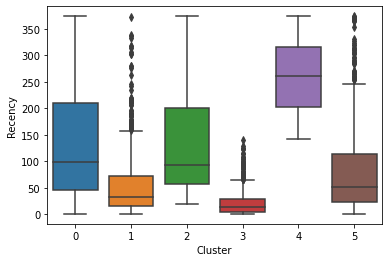

In [44]:
sns.boxplot(x='Cluster', y='Recency', data=df_cluster)


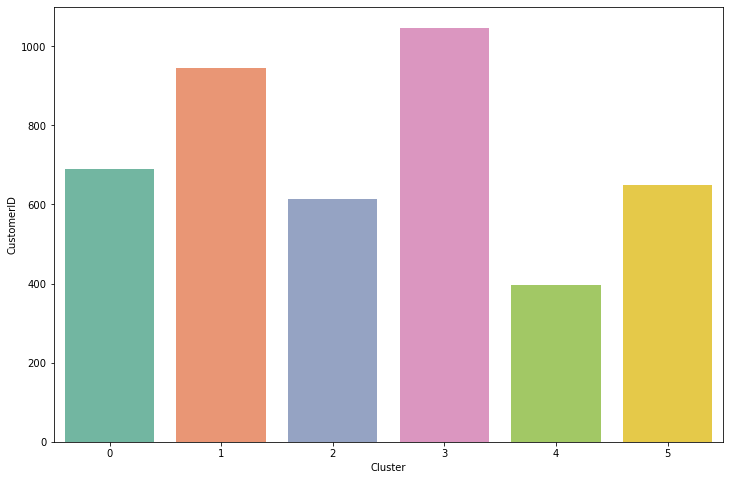

In [45]:
sq1=df_cluster.groupby('Cluster')['CustomerID'].nunique().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12,8))
sns.barplot(data=sq1, x="Cluster", y="CustomerID", palette = "Set2");

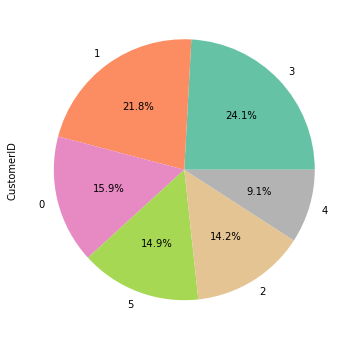

In [46]:
sq1=df_cluster.groupby('Cluster')['CustomerID'].nunique().sort_values(ascending=False).plot(kind='pie',cmap='Set2',figsize=(6,6),autopct='%1.1f%%')
plt.show()

<AxesSubplot:xlabel='Recency', ylabel='Frequency'>

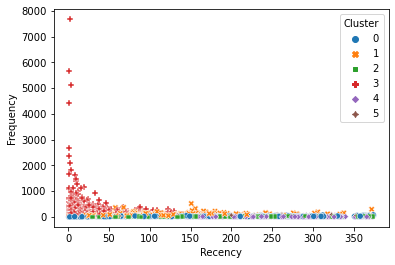

In [47]:
df_cluster
sns.scatterplot(data=df_cluster, y= 'Frequency', x='Recency', hue='Cluster' , style="Cluster")

In [48]:
def rfm_values(df):
    df_new = df.groupby(['Cluster']).agg({
        'Recency': 'mean',
        'Frequency': 'mean',
        'MonetaryValue': ['mean'],
        'Variety': ['mean']
    }).round(0)
    return df_new

In [52]:
13/6

2.1666666666666665

In [51]:
# rfm_values(df_cluster).reset_index()
df_cluster.groupby(['Cluster'])[['Total_Score']].quantile(q=[0.166,0.332, 0.498, 0.664, 0.83,1])
# df_cluster[['Total_Score','Cluster']]

Total_Score
Cluster                   
0       0.166        7.000
        0.332        7.000
        0.498        7.000
        0.664        8.000
        0.830        8.000
        1.000        8.000
1       0.166       11.000
        0.332       11.000
        0.498       12.000
        0.664       12.000
        0.830       13.000
        1.000       13.000
2       0.166        5.000
        0.332        5.000
        0.498        6.000
        0.664        6.000
        0.830        6.000
        1.000        6.000
3       0.166       14.000
        0.332       15.000
        0.498       15.000
        0.664       16.000
        0.830       16.000
        1.000       16.000
4       0.166        4.000
        0.332        4.000
        0.498        4.000
        0.664        4.000
        0.830        4.000
        1.000        4.000
5       0.166        9.000
        0.332        9.000
        0.498        9.000
        0.664       10.000
        0.830       10.000
        1.000       10.000

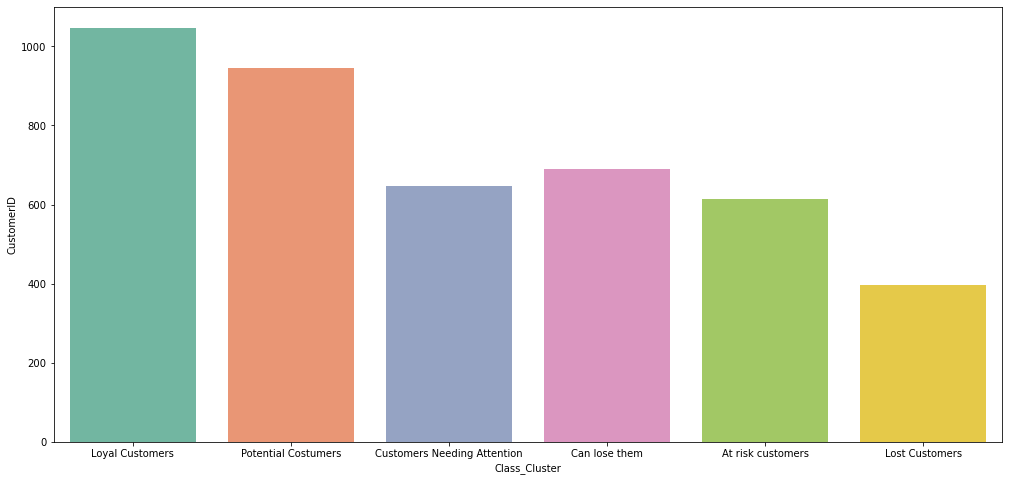

In [76]:
# clus_3 = 'Loyal Customers' , clus_1 = 'Potential Costumers', clus_5 = 'Customers Needing Attention', clus_0 = 'Can lose them', clus_2 = 'At risk customers', clus_4 = 'Lost Customers'

df_cluster['Class_Cluster'] = df_cluster['Cluster'].cat.rename_categories(['Can lose them','Potential Costumers','At risk customers', 'Loyal Customers','Lost Customers','Customers Needing Attention'])
df_cluster['Class_Cluster'] = df_cluster['Class_Cluster'].cat.set_categories(['Loyal Customers','Potential Costumers','Customers Needing Attention','Can lose them','At risk customers','Lost Customers'])
df_cluster[['Cluster','Class_Cluster']]

segmentation1=df_cluster.groupby('Class_Cluster')['CustomerID'].count().sort_values(ascending=False).reset_index()
plt.figure(figsize=(17,8))
segmentation1.drop([0],inplace=False)
sns.barplot(data=segmentation1, x="Class_Cluster", y="CustomerID", palette = "Set2")


In [77]:
df_cluster.Class_Cluster.value_counts()

Loyal Customers                1047
Potential Costumers             944
Can lose them                   689
Customers Needing Attention     648
At risk customers               614
Lost Customers                  396
Name: Class_Cluster, dtype: int64

clus_3 = 'Loyal Customers'
clus_1 = 'Potential Costumers'
clus_5 = 'Customers Needing Attention'
clus_0 = 'Can lose them'
clus_2 = 'At risk customers'
clus_4 = 'Lost Customers'

Cluster 3 => Clientes fieles => Gastan buen dinero con nosotros a menudo y responden a las promociones.

Cluster 1 => Clientes Potenciales => Clientes recientes, pero que gastan una buena cantidad y compran más de una vez.

Cluster 5 => Clientes que necesitan atención => Por encima de la media en cuanto a recencia, frecuencia y valores monetarios. Sin embargo, es posible que no hayan comprado muy recientemente.

Cluster 0 => Puede perderlos => sobre la media de recencia, frecuencia y valores monetarios. No ha comprado recientemente.

Grupo 2 => Clientes en riesgo => Frecuencia, frecuencia y valores monetarios por debajo de la media, además han comprado hace mucho tiempo.

Cluster 4 => Cliente perdido => La última compra fue hace mucho tiempo, gastan poco y tienen pocos pedidos.

Recomendación
Basándonos en los 6 clusters, podríamos formular estrategias de marketing relevantes para cada cluster:

Clúster 3 => Clientes fieles => Hacer upselling de productos de mayor valor, pedir reseñas y comprometerse con ellos.

Clúster 1 => Cliente potencialmente leal => Ofrezca un programa de membresía / lealtad, y recomiende otros productos.

Cluster 5 y 0 => Clientes que necesitan atención y puede perderlos  => Hacer ofertas por tiempo limitado, recomendar en base a compras anteriores, compartir recursos valiosos, recomendar productos populares / renovaciones con descuento, y reconectar con ellos.

Cluster 2 y 4 => Cliente en riesgo y perdido => Reactivar el interés con una campaña de alcance, ignorar lo contrario, ofrecer otros productos relevantes y descuentos especiales, y recrear el valor de la marca.